<a href="https://colab.research.google.com/github/julia-2029/C-digos-do-Projeto-Fantasma/blob/main/Trabalho_1_J%C3%BAlia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Julia
- Clusterização dos pedidos
- Estados que mais/menos gastaram
- Tipo de pagamento mais utilizado
- Nº médio de parcelas
- Quantidade de fotos do produto x avaliação


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
### Importação dos bancos e informações sobre cada um

# banco clientes: id do cliente, id único, cep, cidade, estado
clientes = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_customers_dataset.csv")

# banco itens = id do pedido, id do item do pedido, id do produto, id do vendedor, data limite de envio, preço do pedido, preço do frete
itens = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_order_items_dataset.csv")

# banco pagamento = id do pedido, sequência do pagamento, tipo de pagamento, parcelamento do pagamento, valor do pagamento
pagamento = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_order_payments_dataset.csv")

# banco reviews = id da review, id do pedido, avaliação (1-5), título, mensagem, data de criação, data/hora
reviews = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_order_reviews_dataset.csv")

# banco pedido = id do pedido, id do cliente, status do pedido, data/hora pedido, data de aprovação, data de entrega da transportadora, entrega cliente(data), entrega estimada(data)
pedido = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_orders_dataset.csv")

# banco produtos = id do produto, categoria, tamanho do nome, tamanho descrição, quanti de fotos, peso (gr), comprimento (cm), altura(cm), largura(cm)
produtos = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_products_dataset.csv")

# banco vendedores = id do vendedor, prefixo do cep do vendedor, cidade do vendedor, estado do vendedor
vendedores = pd.read_csv("https://raw.githubusercontent.com/edunb01/dotfiles/master/olist_sellers_dataset.csv")

In [ ]:
#Estados que mais/menos gastaram

clientes.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
pagamento.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
banco1 = clientes.merge(pedido)
banco1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [ ]:
from pandas.core.algorithms import value_counts
banco2 = banco1.merge(pagamento)

banco_graf = banco2.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).head(10).reset_index()

# Exibir o resultado
print(banco_graf)


  customer_state  payment_value
0             SP     5998226.96
1             RJ     2144379.69
2             MG     1872257.26
3             RS      890898.54
4             PR      811156.38
5             SC      623086.43
6             BA      616645.82
7             DF      355141.08
8             GO      350092.31
9             ES      325967.55


Text(0.5, 1.0, 'Top 10 Estados com Maior Soma de Valores de Pagamento')

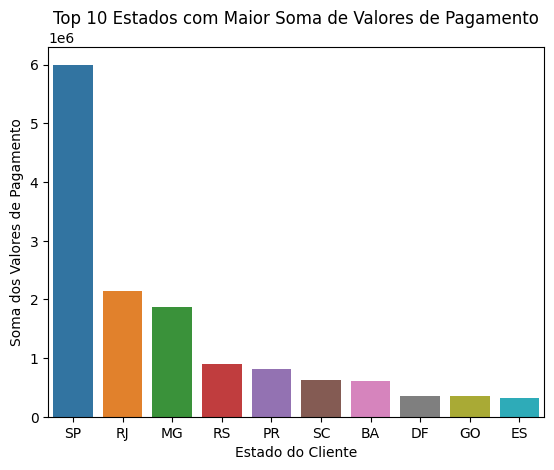

In [ ]:
graf1 = sns.barplot(x = banco_graf['customer_state'],y=banco_graf['payment_value'])
graf1.set(xlabel='Estado do Cliente', ylabel='Soma dos Valores de Pagamento')
graf1.set_title('Top 10 Estados com Maior Soma de Valores de Pagamento')


In [ ]:

banco_graf2 = banco2.groupby('customer_state')['payment_value'].sum().sort_values(ascending=True).head(10).reset_index()

# Exibir o resultado
print(banco_graf2)

  customer_state  payment_value
0             RR       10064.62
1             AP       16262.80
2             AC       19680.62
3             AM       27966.93
4             RO       60866.20
5             TO       61485.33
6             SE       75246.25
7             AL       96962.06
8             RN      102718.13
9             PI      108523.97


Text(0.5, 1.0, 'Top 10 Estados com Menor Soma de Valores de Pagamento')

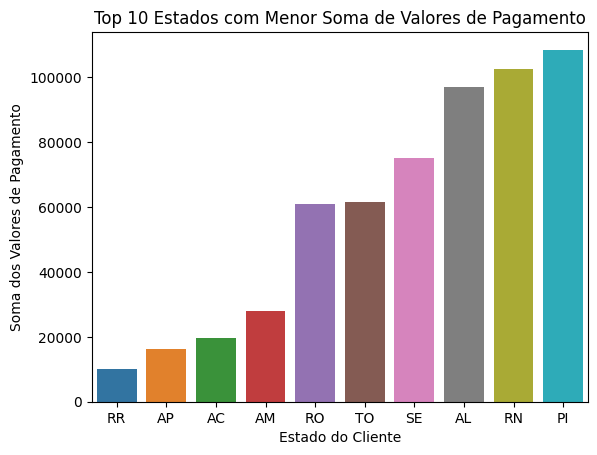

In [ ]:
graf2 = sns.barplot(x = banco_graf2['customer_state'],y=banco_graf2['payment_value'])
graf2.set(xlabel='Estado do Cliente', ylabel='Soma dos Valores de Pagamento')
graf2.set_title('Top 10 Estados com Menor Soma de Valores de Pagamento')


In [ ]:
#Tipo de pagamento mais utilizado

# Conta a ocorrência de cada valor na coluna "payment_type"
contagem = pagamento['payment_type'].value_counts()

# Prepara os rótulos e tamanhos para o gráfico de setores
rotulos = contagem.index
dados = contagem.values


rotulos = ['Cartão de crédito','Boleto','Voucher','Cartão de Débito']


In [ ]:

# Usando a função zip para combinar rótulos e valores
dados_combinados = list(zip(rotulos, dados))

# Exibindo o resultado
print(dados_combinados)


[('Cartão de crédito', 76795), ('Boleto', 19784), ('Voucher', 5775), ('Cartão de Débito', 1529)]


In [ ]:
df = pd.DataFrame(dados_combinados, columns=['Rotulos', 'Dados'])
df


,Rotulos,Dados
0,Cartão de crédito,76795
1,Boleto,19784
2,Voucher,5775
3,Cartão de Débito,1529


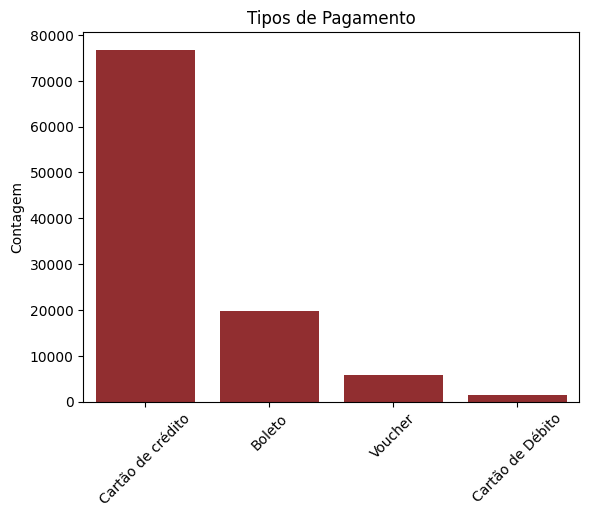

In [ ]:
cor_personalizada = '#A11D21'

# Criar o gráfico de barras com a cor personalizada
sns.barplot(x='Rotulos', y='Dados', data=df, color=cor_personalizada)


# Adicione rótulos e título
plt.ylabel('Contagem')
plt.xlabel('')
plt.title('Tipos de Pagamento')

# Rotaciona os rótulos no eixo x para torná-los mais legíveis
plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

In [ ]:
# Categorias mais compradas
pay_product = itens.merge(produtos)


categorias_mais_frequentes = pay_product['product_category_name'].value_counts().head(10)
categorias_mais_frequentes



cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: product_category_name, dtype: int64

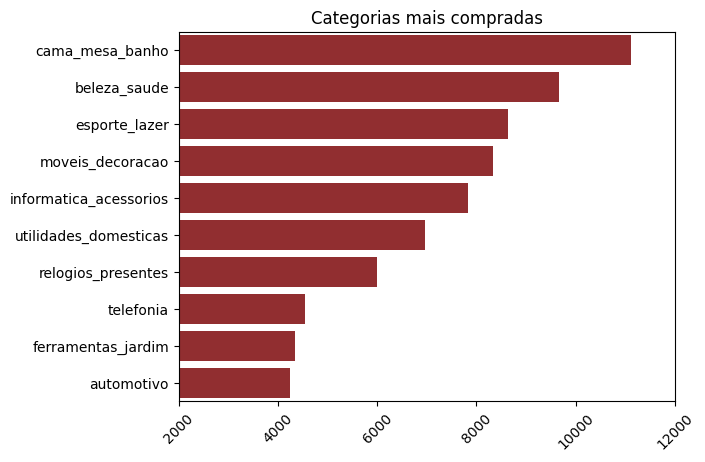

In [ ]:

sns.barplot(y=categorias_mais_frequentes.index, x=categorias_mais_frequentes.values, color=cor_personalizada)
plt.xlim(2000, 12000)
# Adicione rótulos e título
#plt.ylabel('Contagem')
#plt.xlabel('Categoria')
plt.title('Categorias mais compradas')

# Rotaciona os rótulos no eixo x para torná-los mais legíveis
plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

In [ ]:
banco2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,credit_card,8,252.25


In [ ]:
# Nº médio de parcelas


media_pagamentos = pagamento['payment_installments'].mean()
print(media_pagamentos)



2.853348863176944


In [ ]:
produtos.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
